In [144]:
import pandas as pd 
import numpy as np
import PyPDF2

import re
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

import glob # Package for Unix-style pathname pattern expansion
import os   # Python operating system interface

import nltk
from nltk.text import Text

import networkx as nx
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [406]:
def freq_30(tokens):    

    global freqdist
    freqdist = FreqDist(tokens)
    a=list(freqdist.keys())
    for i in a:
        if len(i) < 3:
            del freqdist[i]
    df_fdist = pd.DataFrame.from_dict(freqdist, orient='index')

    frequent_words=df_fdist.nlargest(30, [0], keep='first')
    nodes = frequent_words.index.to_list()
    x = np.array(frequent_words)

    global freq_list
    freq_list=[]
    freq_list.extend(nodes)

    return freq_list

def freq_bigram(tokens):
    bgs=nltk.bigrams(tokens)
    global fdist_bi
    fdist_bi = nltk.FreqDist(bgs)
    return fdist_bi

In [402]:
with open('data.json') as json_file:
    data = json.load(json_file)

In [409]:
freq_dic={}
for i in data:

    freq_30(data[i])
    d=freqdist.most_common(30)
    freq_dic.update({i:d})

In [411]:
freq_bi_dic={}
for i in data:
    freq_bigram(tokens)
    d=fdist_bi.most_common(30)
    freq_bi_dic.update({i:d})

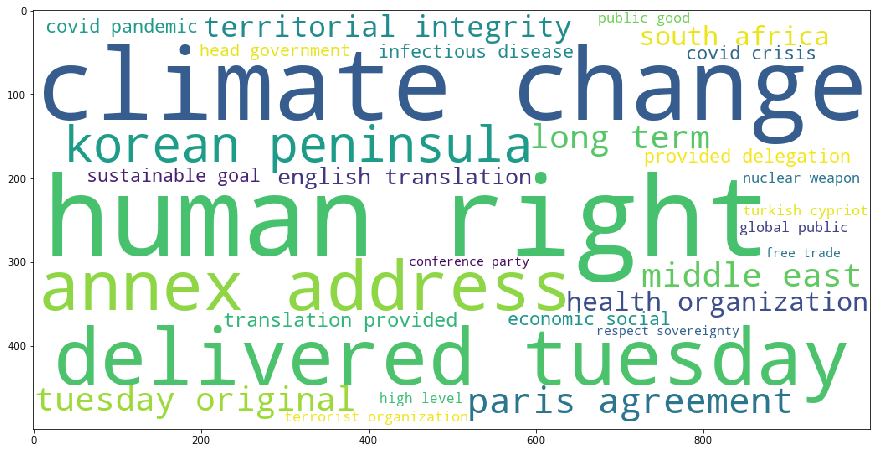

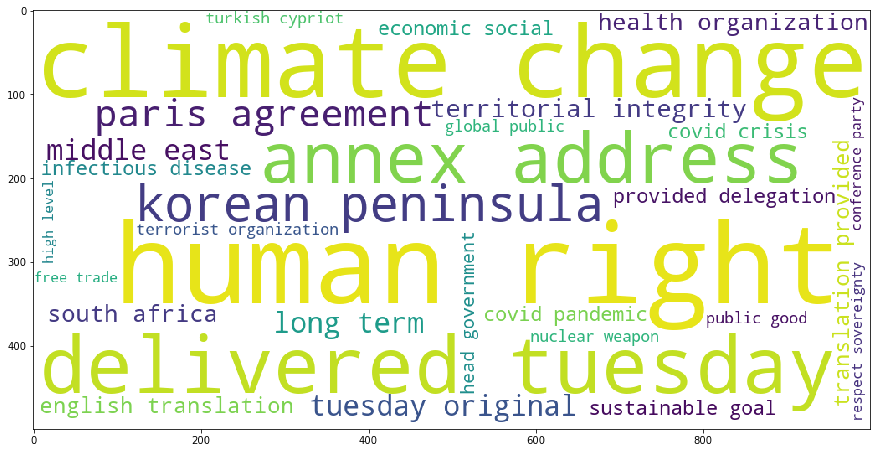

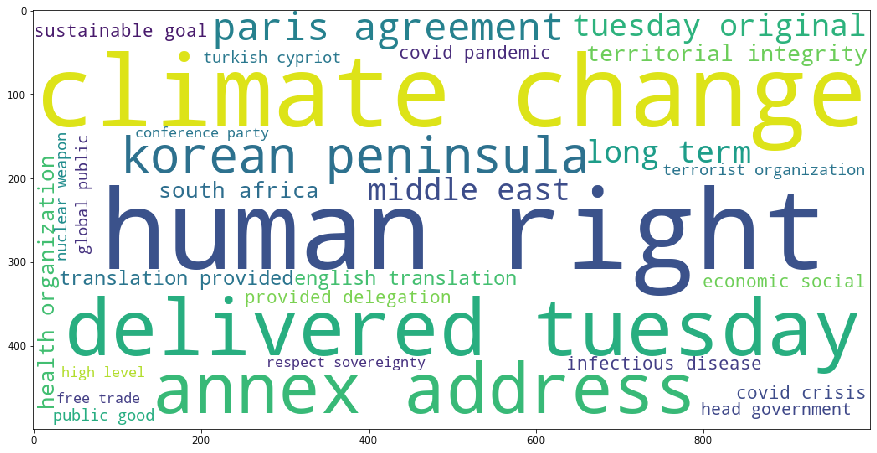

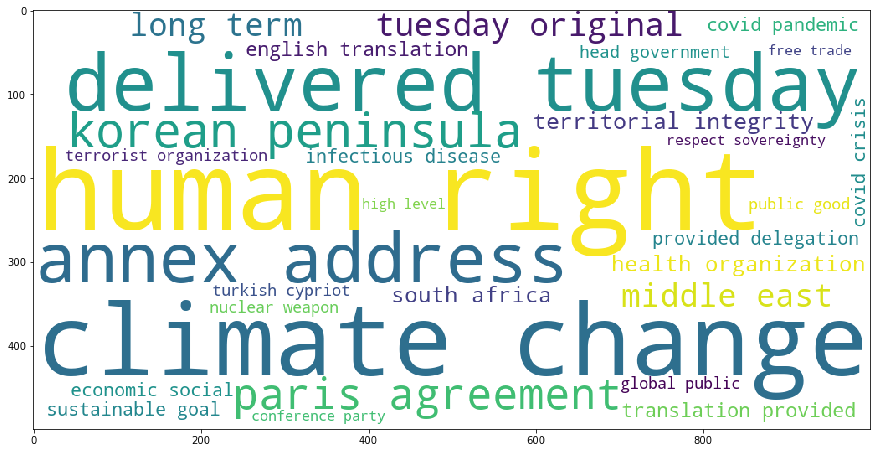

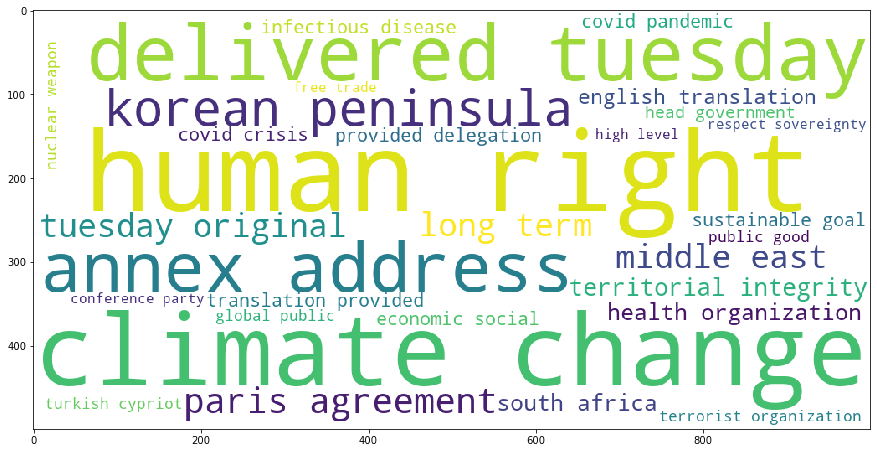

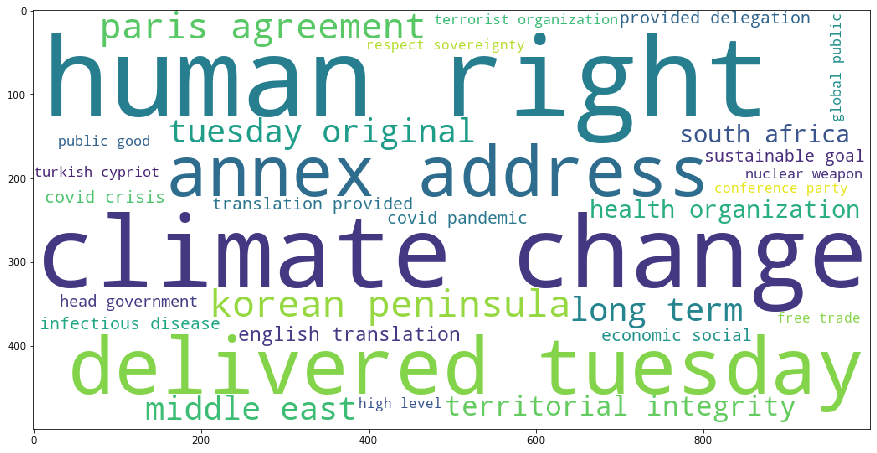

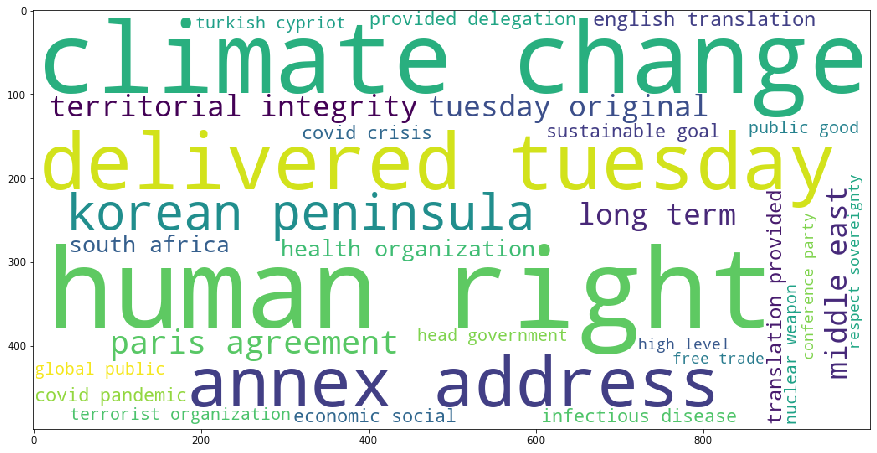

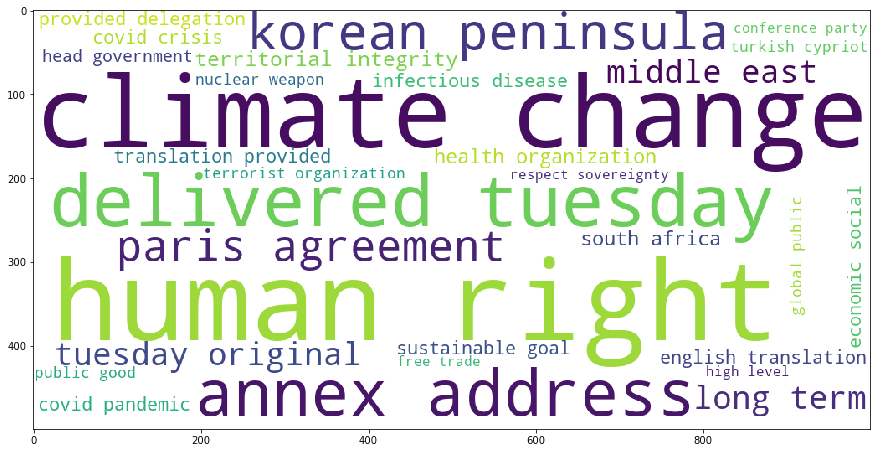

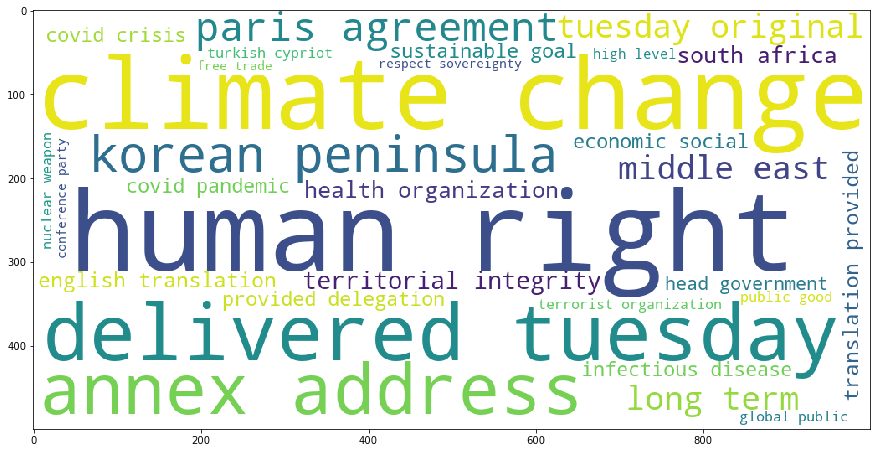

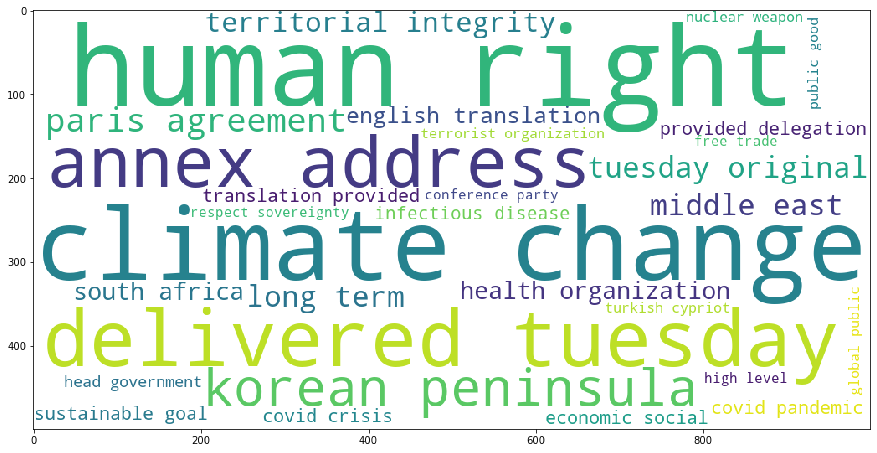

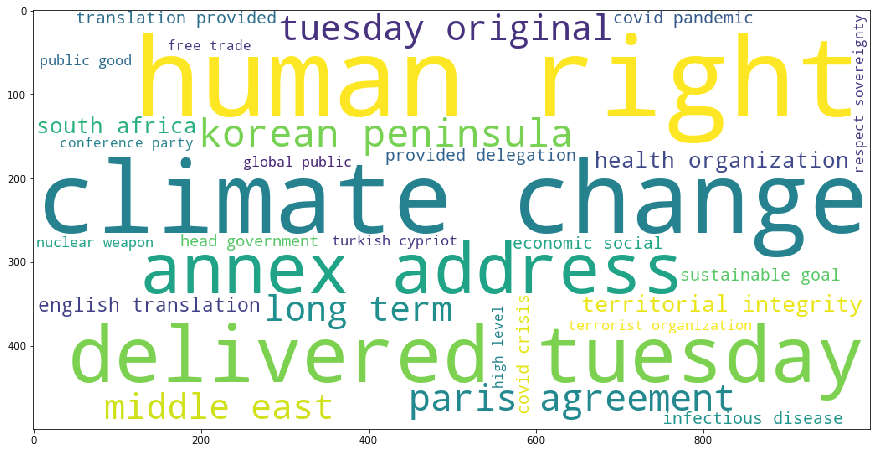

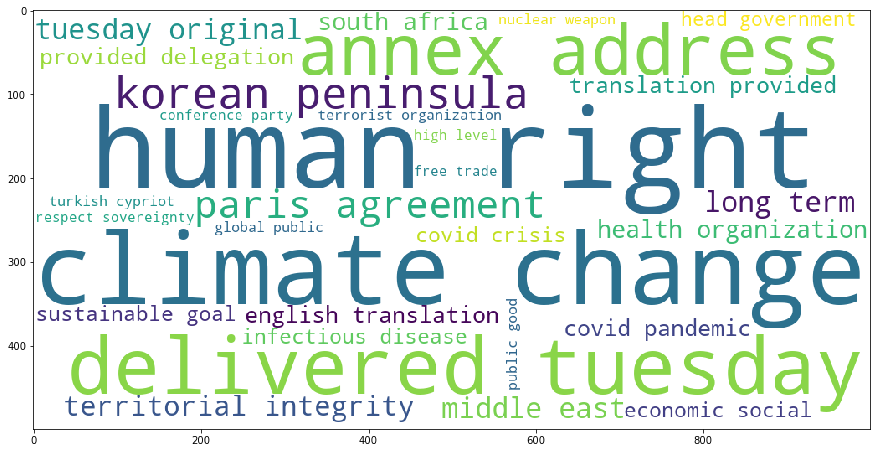

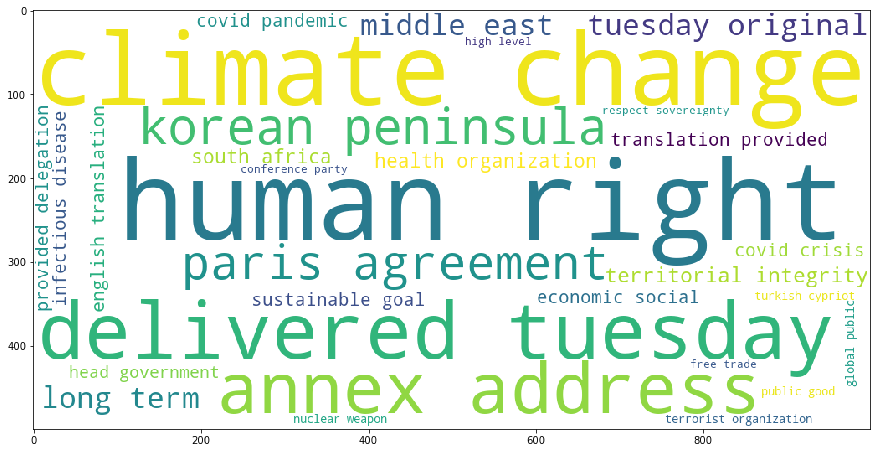

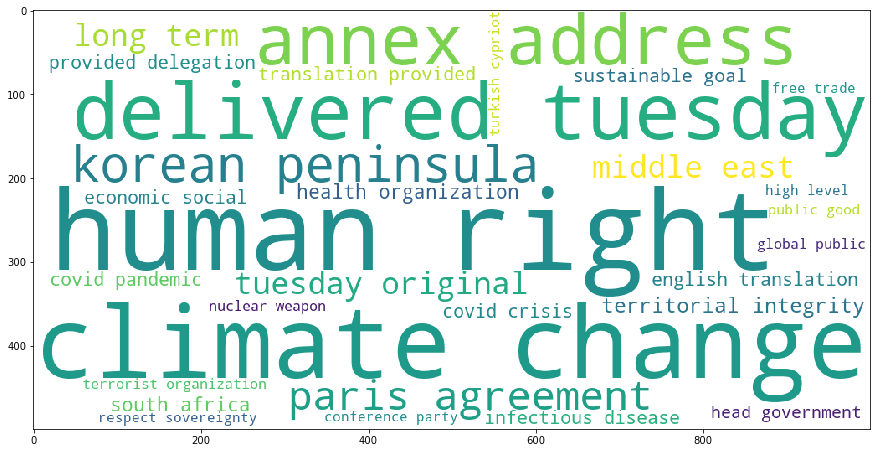

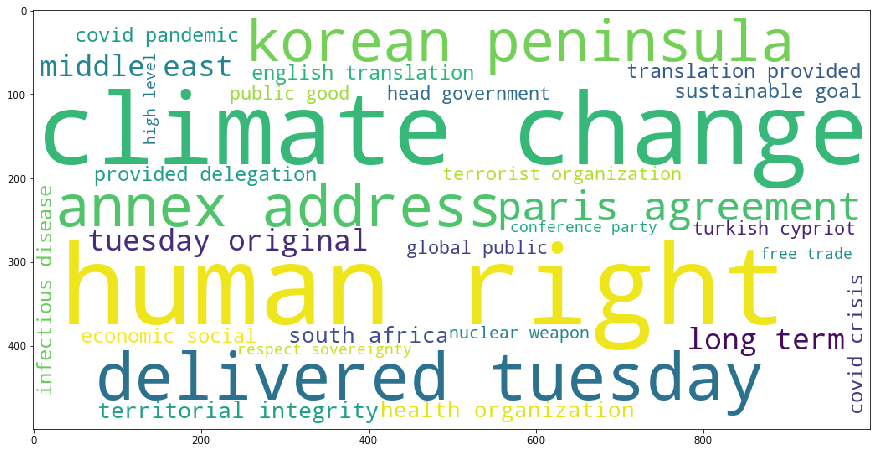

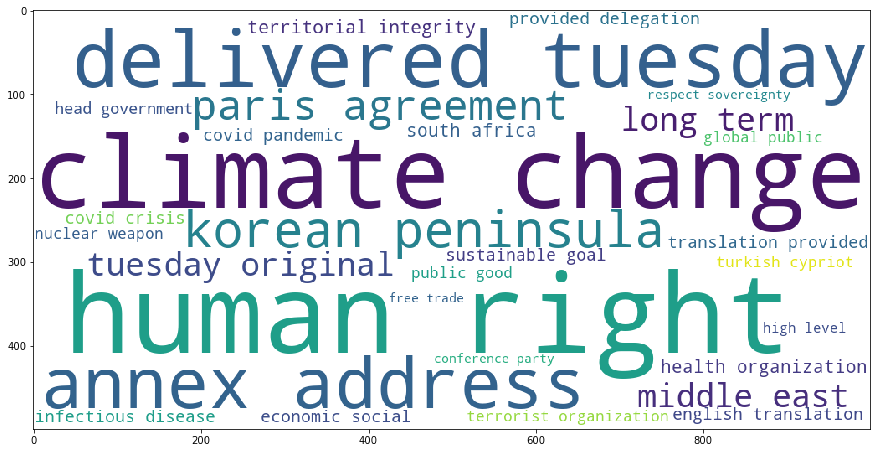

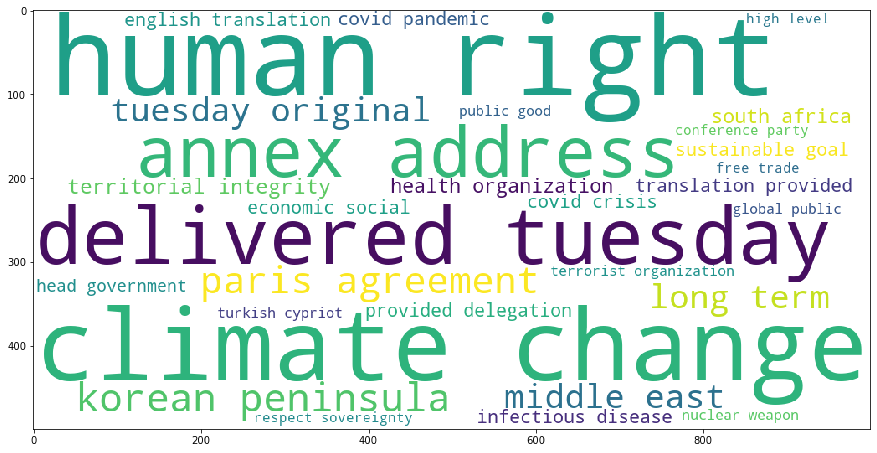

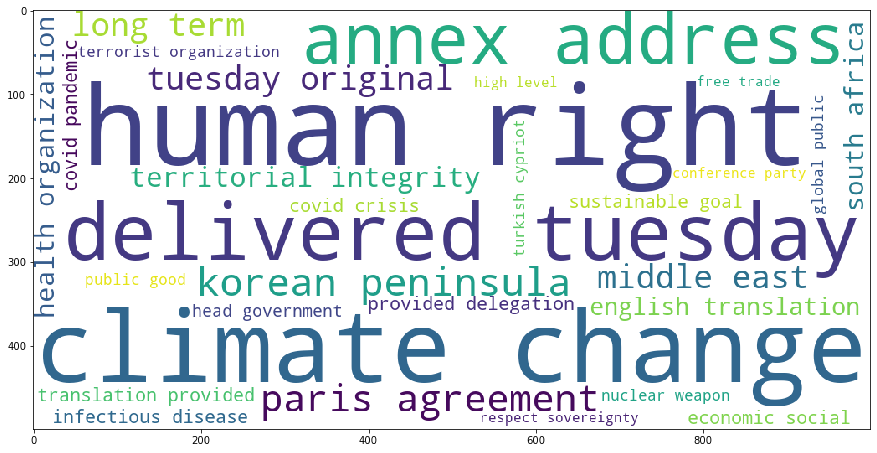

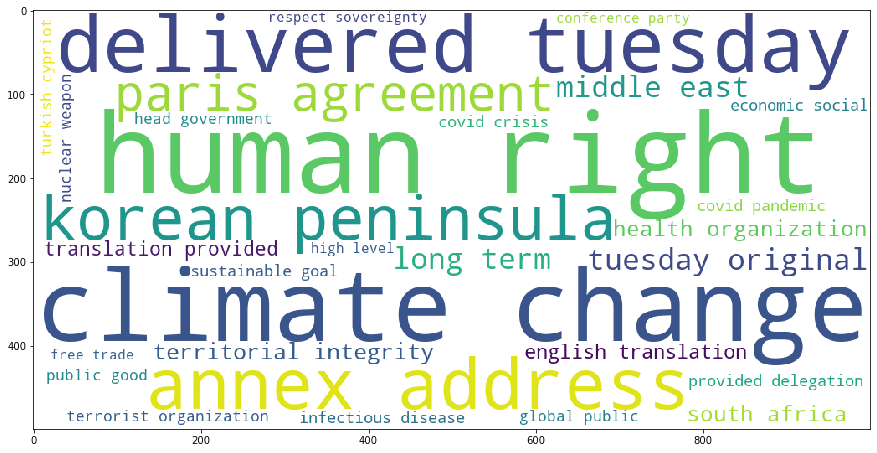

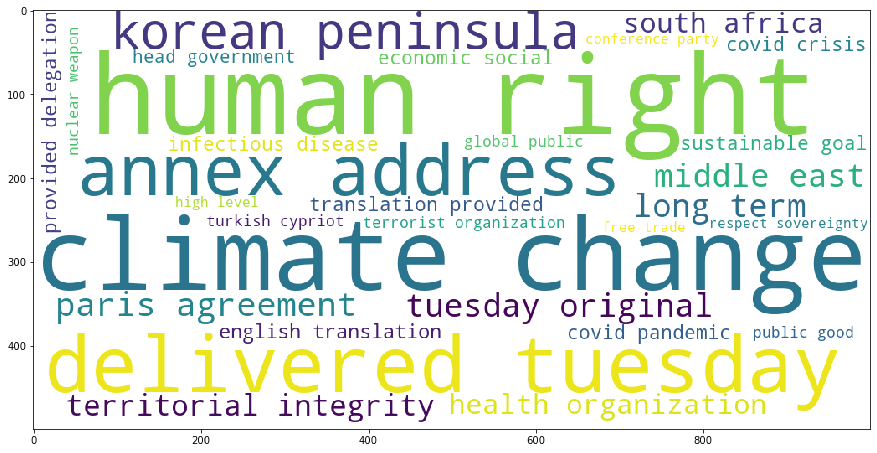

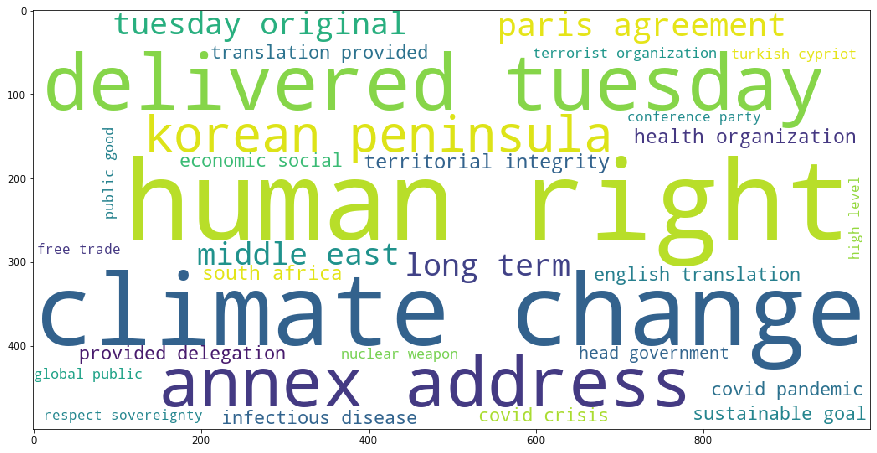

In [412]:
from wordcloud import WordCloud


for j in freq_bi_dic:

    freq_bigrams={}
    da=freq_bi_dic[j]
    for i in da:
        k=i[0][0]+" "+i[0][1]
        v=i[1]
        
        freq_bigrams.update({k:v})
    freq_bigrams

    wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(freq_bigrams)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)